In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
# from sklearn.linear_model import LinearRegression, 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import joblib as jlb

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Exploratory Data Analysis

In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.describe(include='O')

,key,pickup_datetime
count,200000,200000
unique,3600,196629
top,51:00.0,2009-02-12 12:46:00 UTC
freq,1663,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df.count()

Unnamed: 0           200000
key                  200000
fare_amount          200000
pickup_datetime      200000
pickup_longitude     200000
pickup_latitude      200000
dropoff_longitude    199999
dropoff_latitude     199999
passenger_count      200000
dtype: int64

# Data Cleaning

In [9]:
cleaned_df = df.copy()

In [12]:
cleaned_df.drop("Unnamed: 0",axis=1, inplace=True)

In [13]:
cleaned_df.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,27:09.0,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,06:00.0,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [15]:
##Dropping column key

cleaned_df.drop("key",axis=1, inplace=True)

In [16]:
cleaned_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
cleaned_df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [21]:
cleaned_df.isna()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [22]:
cleaned_df.dropna(inplace=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [26]:
bad_rows= cleaned_df[(cleaned_df["pickup_longitude"]==0)|
    (cleaned_df["pickup_latitude"]==0)|
    (cleaned_df["dropoff_longitude"]==0)|
    (cleaned_df["dropoff_latitude"]==0)].index

In [27]:
cleaned_df.drop(bad_rows, inplace=True)

In [28]:
cleaned_df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
8,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1
10,6.5,2015-05-22 17:32:27 UTC,-73.974388,40.746952,-73.988586,40.729805,1


In [29]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196031 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        196031 non-null  float64
 1   pickup_datetime    196031 non-null  object 
 2   pickup_longitude   196031 non-null  float64
 3   pickup_latitude    196031 non-null  float64
 4   dropoff_longitude  196031 non-null  float64
 5   dropoff_latitude   196031 non-null  float64
 6   passenger_count    196031 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.0+ MB


In [31]:
bad_rows=cleaned_df[cleaned_df["fare_amount"]<0].index

In [32]:
cleaned_df.drop(bad_rows, inplace=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196015 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        196015 non-null  float64
 1   pickup_datetime    196015 non-null  object 
 2   pickup_longitude   196015 non-null  float64
 3   pickup_latitude    196015 non-null  float64
 4   dropoff_longitude  196015 non-null  float64
 5   dropoff_latitude   196015 non-null  float64
 6   passenger_count    196015 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.0+ MB


In [33]:
bad_rows=cleaned_df[(cleaned_df["passenger_count"]<0)|
    (cleaned_df["passenger_count"]>6)].index


In [38]:
same_location = cleaned_df[
    (cleaned_df["pickup_latitude"] == cleaned_df["dropoff_latitude"]) &
    (cleaned_df["pickup_longitude"] == cleaned_df["dropoff_longitude"])
    ].index

In [36]:
cleaned_df.drop(bad_rows, inplace=True)

In [39]:
cleaned_df.drop(same_location, inplace=True)

In [40]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193969 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193969 non-null  float64
 1   pickup_datetime    193969 non-null  object 
 2   pickup_longitude   193969 non-null  float64
 3   pickup_latitude    193969 non-null  float64
 4   dropoff_longitude  193969 non-null  float64
 5   dropoff_latitude   193969 non-null  float64
 6   passenger_count    193969 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.8+ MB


## Feature Engineering

In [43]:
## converting the two longitude and latitude to distance in km using Haversine formula

def Haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lat2, lon1, lon2 = map(
        np.radians, [lat1, lat2, lon1, lon2]
    ) 
    dlat = lat2-lat1
    dlon = lon2-lon1

    a = (np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2)

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    d = R * c
    return d

In [44]:
cleaned_df["trip_distance_km"] = Haversine(    
    cleaned_df["pickup_latitude"],
    cleaned_df["pickup_longitude"],
    cleaned_df["dropoff_latitude"],
    cleaned_df["dropoff_longitude"])

cleaned_df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
6,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5,11.731015
8,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1,2.332711
9,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1,4.889417
10,6.5,2015-05-22 17:32:27 UTC,-73.974388,40.746952,-73.988586,40.729805,1,2.250858
12,3.3,2011-05-17 14:03:00 UTC,-73.966378,40.804440,-73.965890,40.807133,5,0.302252


In [45]:
cleaned_df["pickup_datetime"] = pd.to_datetime(cleaned_df["pickup_datetime"])

In [46]:
cleaned_df["hour"] = cleaned_df["pickup_datetime"].dt.hour
cleaned_df["day_of_week"] = cleaned_df["pickup_datetime"].dt.day
cleaned_df["month"] = cleaned_df["pickup_datetime"].dt.month
cleaned_df["is_weekend"] = cleaned_df["day_of_week"].isin([5,6]).astype(int)

In [48]:
cleaned_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance_km,hour,day_of_week,month,is_weekend
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,7,5,0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,17,7,0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,24,8,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,26,6,0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,28,8,0


In [49]:
cleaned_df.drop(columns=["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_latitude", "dropoff_longitude"], axis=1, inplace=True)

cleaned_df.head()

,fare_amount,passenger_count,trip_distance_km,hour,day_of_week,month,is_weekend
0,7.5,1,1.683323,19,7,5,0
1,7.7,1,2.457590,20,17,7,0
2,12.9,1,5.036377,21,24,8,0
3,5.3,3,1.661683,8,26,6,0
4,16.0,5,4.475450,17,28,8,0


In [53]:
filtered_df = cleaned_df.copy()

In [54]:
filtered_df["fare_amount"].dtype

dtype('float64')

In [61]:
filtered_df = filtered_df[filtered_df["trip_distance_km"] <= 100]


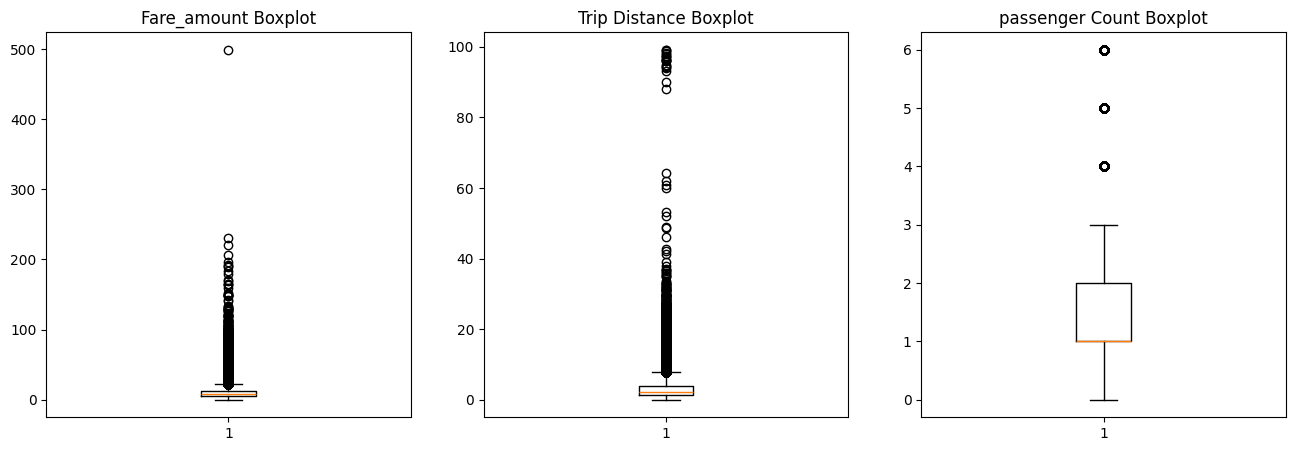

In [62]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
plt.boxplot(filtered_df["fare_amount"])
plt.title("Fare_amount Boxplot")

plt.subplot(1, 3, 2)
plt.boxplot(filtered_df["trip_distance_km"])
plt.title("Trip Distance Boxplot")

plt.subplot(1, 3, 3)
plt.boxplot(filtered_df["passenger_count"])
plt.title("passenger Count Boxplot")

plt.show()

In [63]:
Q1 = filtered_df["fare_amount"].quantile(0.25)
Q3 = filtered_df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

fare_amount_outliers_df = filtered_df[(filtered_df["fare_amount"] < lower) | (filtered_df["fare_amount"] > upper)]
fare_amount_outliers_df.describe()

,fare_amount,passenger_count,trip_distance_km,hour,day_of_week,month,is_weekend
count,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000
mean,36.902420,1.722045,12.080133,13.043389,15.663750,6.485607,0.061614
std,14.513707,1.326344,5.835248,6.536300,8.711532,3.395099,0.240460
min,22.270000,0.000000,0.000084,0.000000,1.000000,1.000000,0.000000
25%,26.500000,1.000000,8.466369,8.000000,8.000000,4.000000,0.000000
50%,32.500000,1.000000,10.478394,14.000000,16.000000,6.000000,0.000000
75%,45.000000,2.000000,16.003168,18.000000,23.000000,9.000000,0.000000
max,499.000000,6.000000,98.364525,23.000000,31.000000,12.000000,1.000000


In [64]:
non_outliers_df = filtered_df[(~filtered_df.index.isin(fare_amount_outliers_df.index))]
non_outliers_df.describe()

,fare_amount,passenger_count,trip_distance_km,hour,day_of_week,month,is_weekend
count,177308.000000,177308.000000,177308.000000,177308.000000,177308.000000,177308.000000,177308.000000
mean,8.958793,1.680325,2.546867,13.529260,15.709116,6.262808,0.065682
std,4.138573,1.305236,2.062354,6.512207,8.685587,3.444116,0.247727
min,0.000000,0.000000,0.000084,0.000000,1.000000,1.000000,0.000000
25%,5.700000,1.000000,1.220959,9.000000,8.000000,3.000000,0.000000
50%,8.000000,1.000000,2.008668,14.000000,16.000000,6.000000,0.000000
75%,11.000000,2.000000,3.326950,19.000000,23.000000,9.000000,0.000000
max,22.200000,6.000000,99.162509,23.000000,31.000000,12.000000,1.000000


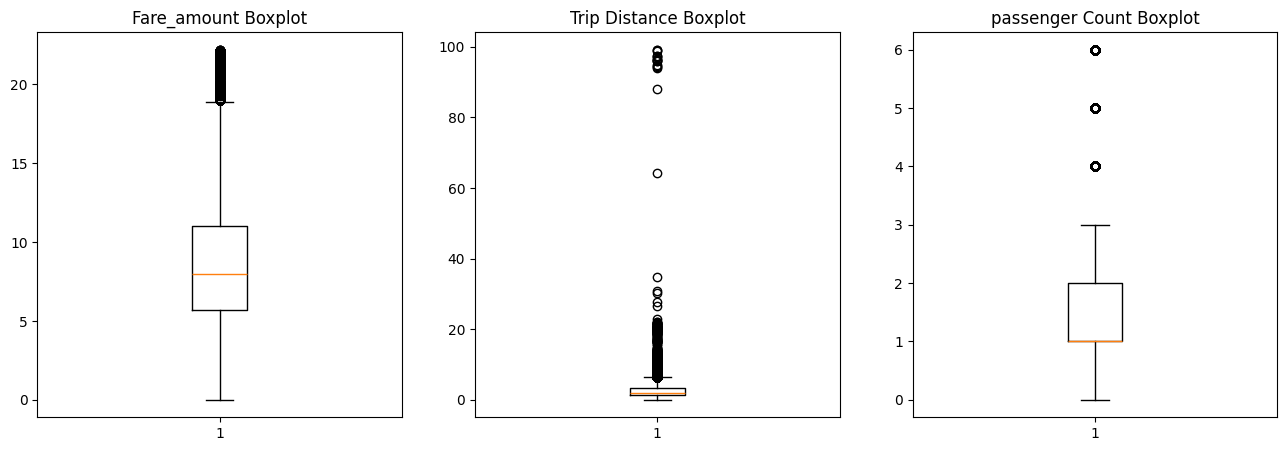

In [65]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
plt.boxplot(non_outliers_df["fare_amount"])
plt.title("Fare_amount Boxplot")

plt.subplot(1, 3, 2)
plt.boxplot(non_outliers_df["trip_distance_km"])
plt.title("Trip Distance Boxplot")

plt.subplot(1, 3, 3)
plt.boxplot(non_outliers_df["passenger_count"])
plt.title("passenger Count Boxplot")

plt.show()

In [73]:
cleaned_df = cleaned_df[
    (cleaned_df["fare_amount"] > 0) &
    (cleaned_df["fare_amount"] <= 100)
]


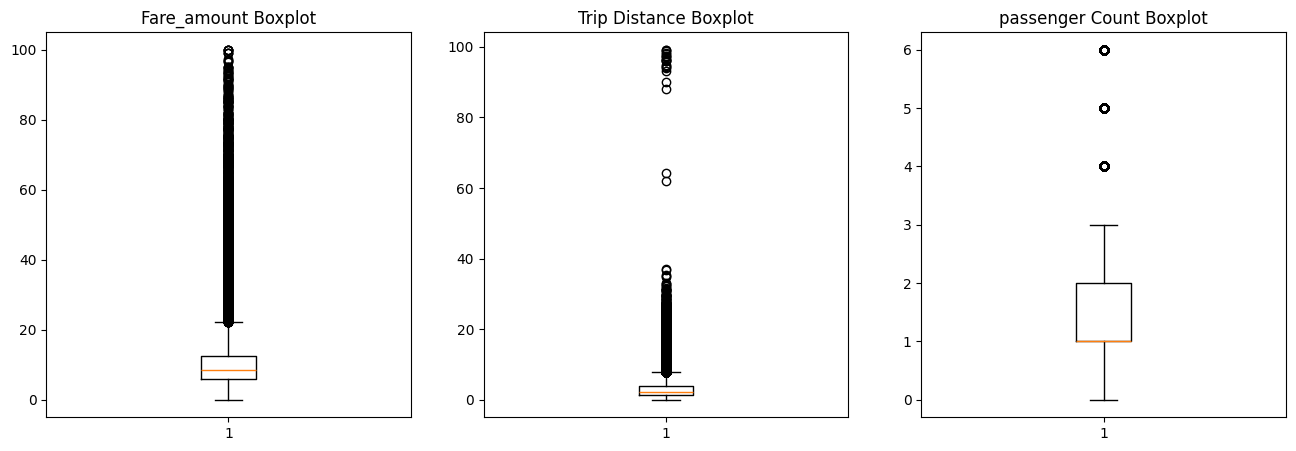

In [74]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
plt.boxplot(cleaned_df["fare_amount"])
plt.title("Fare_amount Boxplot")

plt.subplot(1, 3, 2)
plt.boxplot(cleaned_df["trip_distance_km"])
plt.title("Trip Distance Boxplot")

plt.subplot(1, 3, 3)
plt.boxplot(cleaned_df["passenger_count"])
plt.title("passenger Count Boxplot")

plt.show()

In [102]:
cleaned_df[
    (cleaned_df["fare_amount"] <= 100)
]

,fare_amount,passenger_count,trip_distance_km,hour,day_of_week,month
0,7.5,1,1.683323,19,7,5
1,7.7,1,2.457590,20,17,7
2,12.9,1,5.036377,21,24,8
3,5.3,3,1.661683,8,26,6
4,16.0,5,4.475450,17,28,8
...,...,...,...,...,...,...
199995,3.0,1,0.112210,10,28,10
199996,7.5,1,1.875050,1,14,3
199997,30.9,2,12.850319,0,29,6
199998,14.5,1,3.539715,14,20,5


In [91]:
cleaned_df.drop("is_weekend", axis=1, inplace=True)

# Training Model

In [92]:
X = cleaned_df.drop(columns=["fare_amount"], axis=1)
y = cleaned_df["fare_amount"]

In [93]:
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(155044, 6)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [95]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    return {"MSE": mse,
            "MAE": mae, 
            "R2":r2
           }

dt = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_results = evaluate_model(dt, X_train, X_test, y_train, y_test)

rfr = RandomForestRegressor(random_state=42, n_estimators=200, n_jobs=-1, max_depth=15)
rfr_results = evaluate_model(rfr, X_train, X_test, y_train, y_test)

xgb = XGBRegressor(
    random_state=42, 
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=8,
    subsample=0.8, 
    colsample_bytree=0.8,
    n_jobs=-1
)
xgb_results = evaluate_model(xgb, X_train, X_test, y_train, y_test)
results = {
    "Decision Tree": dt_results,
    "Random Forest": rfr_results,
    "XGB Regressor": xgb_results
}
print(results)

{'Decision Tree': {'MSE': 20.07708642527076, 'MAE': 2.3119531117584704, 'R2': 0.7736567318351393}, 'Random Forest': {'MSE': 18.14233373140324, 'MAE': 2.2898505119812884, 'R2': 0.7954685743776677}, 'XGB Regressor': {'MSE': 18.769666292414176, 'MAE': 2.287916810056631, 'R2': 0.7883962084437979}}


#### We evaluated using different models, we're going with Random forest which has the highest r2 score and lowest MSE

# Visual Representation of Feature importance

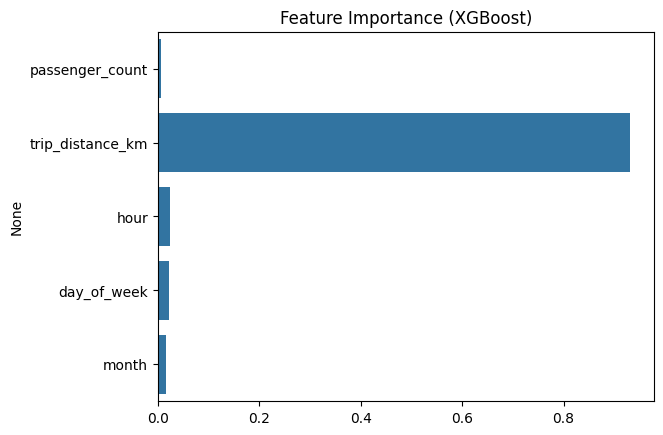

In [96]:
feature_importances = rfr.feature_importances_
sns.barplot(x=feature_importances, y=X_train.columns)
plt.title("Feature Importance (XGBoost)")
plt.show()


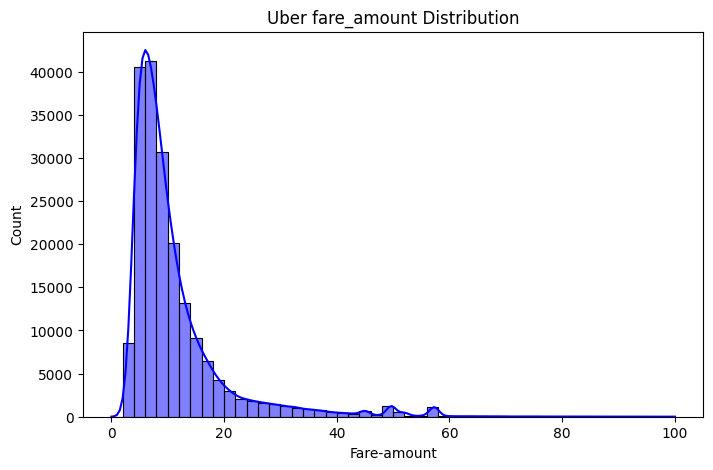

In [97]:
plt.figure(figsize=(8,5))
sns.histplot(cleaned_df["fare_amount"], bins=50, kde=True, color="blue")
plt.title("Uber fare_amount Distribution")
plt.xlabel("Fare-amount")
plt.ylabel("Count")
plt.show()


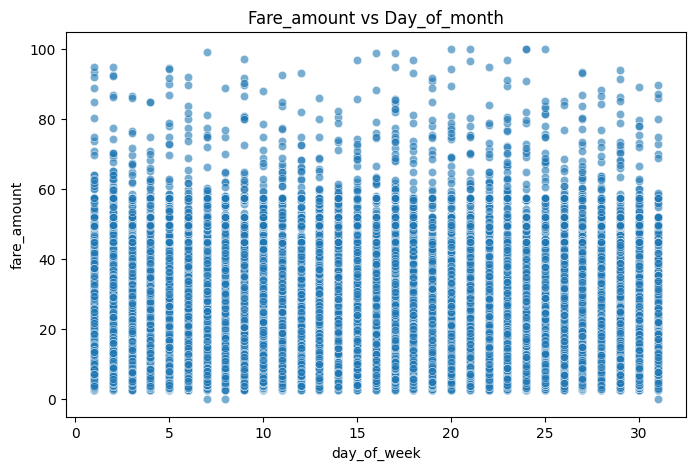

In [98]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="day_of_week", y="fare_amount", data=cleaned_df, alpha=0.6)
plt.title("Fare_amount vs Day_of_month")
plt.show()

In [101]:
jlb.dump(rfr, "RFR_Uber_Price_Prediction_model")

['RFR_Uber_Price_Prediction_model']